# CSE 5095 Team 12 Project

In [ ]:
!git clone https://github.com/pierluigiferrari/ssd_keras.git

Cloning into 'ssd_keras'...
remote: Enumerating objects: 1608, done.
remote: Total 1608 (delta 0), reused 0 (delta 0), pack-reused 1608
Receiving objects: 100% (1608/1608), 19.71 MiB | 14.57 MiB/s, done.
Resolving deltas: 100% (1058/1058), done.


In [ ]:
%env PYTHONPATH = # /env/python

env: PYTHONPATH=# /env/python


In [ ]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-py38_4.12.0-Linux-x86_64.sh
!chmod +x Miniconda3-py38_4.12.0-Linux-x86_64.sh
!./Miniconda3-py38_4.12.0-Linux-x86_64.sh -b -f -p /usr/local
!conda update conda

--2024-05-01 21:54:47--  https://repo.anaconda.com/miniconda/Miniconda3-py38_4.12.0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76120962 (73M) [application/x-sh]
Saving to: ‘Miniconda3-py38_4.12.0-Linux-x86_64.sh’

Miniconda3-py38_4.1 100%[===================>]  72.59M  87.0MB/s    in 0.8s    

2024-05-01 21:54:48 (87.0 MB/s) - ‘Miniconda3-py38_4.12.0-Linux-x86_64.sh’ saved [76120962/76120962]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - _openmp_mutex==4.5=1_gnu
    - brotlipy==0.7.0=py38h27cfd23_1003
    - ca-certificates==2022.3.29=h06a4308_1
    - certifi==2021.10.8=py38h06a4308_2
    - cffi==1.15.0=py38hd667e15_1
  

In [ ]:
import sys
sys.path.append('/usr/local/lib/python3.8/site-packages')

In [ ]:
!conda create -n myenv python=3.6

Solving environment: / failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: / - \ | / - \ done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 24.4.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local/envs/myenv

  added / updated specs:
    - python=3.6


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2021.5.30          |   py36h06a4308_0         139 KB
    openssl-1.1.1w             |       h7f8727e_0         3.7 MB
    pip-21.2.2                 |   py36h06a4308_0         1.8 MB
    python-3.6.13              |       h12debd9_1        32.5 MB
    setuptools-58.0.4          |   py36h06a4308_0         788 KB
    ------------------------------------------------------------
     

In [ ]:
%%shell
eval "$(conda shell.bash hook)"
conda activate myenv
pip install tensorflow==1.15

In [ ]:
%%shell
eval "$(conda shell.bash hook)"
conda activate myenv
conda env list

# conda environments:
#
base                     /usr/local
myenv                 *  /usr/local/envs/myenv



In [ ]:
%env PYTHONPATH = /content/

env: PYTHONPATH=/content/


In [ ]:
%%shell
eval "$(conda shell.bash hook)"
conda activate myenv
python /ssd_keras/ssd300_training.ipynb

python: can't open file '/ssd_keras/ssd300_training.ipynb': [Errno 2] No such file or directory


CalledProcessError: Command 'eval "$(conda shell.bash hook)"
conda activate myenv
python /ssd_keras/ssd300_training.ipynb
' returned non-zero exit status 2.

## Import Necessary Libraries

In [ ]:
import os
import shutil
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import Compose, Resize, ConvertImageDtype, ToTensor
from torchvision.io import read_image
from torch.utils.data.dataloader import default_collate

import tensorflow.keras.backend as K
from tensorflow.keras.layers import InputSpec, Layer
from keras.models import load_model
from keras.preprocessing import image
from keras.optimizers import Adam
from imageio import imread
import numpy as np
from matplotlib import pyplot as plt

import sys
sys.path.append('/content/ssd_keras/')

from models.keras_ssd300 import ssd_300
from keras_loss_function.keras_ssd_loss import SSDLoss
from keras_layers.keras_layer_AnchorBoxes import AnchorBoxes
from keras_layers.keras_layer_DecodeDetections import DecodeDetections
from keras_layers.keras_layer_DecodeDetectionsFast import DecodeDetectionsFast
from keras_layers.keras_layer_L2Normalization import L2Normalization

from ssd_encoder_decoder.ssd_output_decoder import decode_detections, decode_detections_fast

from data_generator.object_detection_2d_data_generator import DataGenerator
from data_generator.object_detection_2d_photometric_ops import ConvertTo3Channels
from data_generator.object_detection_2d_geometric_ops import Resize
from data_generator.object_detection_2d_misc_utils import apply_inverse_transforms

%matplotlib inline

/bin/bash: line 4: import: command not found
/bin/bash: line 5: import: command not found
/bin/bash: line 6: import: command not found
/bin/bash: line 7: from: command not found
/bin/bash: line 8: from: command not found
/bin/bash: line 9: from: command not found
/bin/bash: line 10: from: command not found
/bin/bash: line 12: import: command not found
/bin/bash: line 13: from: command not found
/bin/bash: line 14: from: command not found
/bin/bash: line 15: from: command not found
/bin/bash: line 16: from: command not found
/bin/bash: line 17: from: command not found
/bin/bash: line 18: import: command not found
/bin/bash: line 19: from: command not found
/bin/bash: line 21: import: command not found
/bin/bash: -c: line 22: syntax error near unexpected token `'/content/ssd_keras/''
/bin/bash: -c: line 22: `sys.path.append('/content/ssd_keras/')'


CalledProcessError: Command 'eval "$(conda shell.bash hook)"
conda activate myenv

import os
import shutil
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import Compose, Resize, ConvertImageDtype, ToTensor
from torchvision.io import read_image
from torch.utils.data.dataloader import default_collate

import tensorflow.keras.backend as K
from tensorflow.keras.layers import InputSpec, Layer
from keras.models import load_model
from keras.preprocessing import image
from keras.optimizers import Adam
from imageio import imread
import numpy as np
from matplotlib import pyplot as plt

import sys
sys.path.append('/content/ssd_keras/')

from models.keras_ssd300 import ssd_300
from keras_loss_function.keras_ssd_loss import SSDLoss
from keras_layers.keras_layer_AnchorBoxes import AnchorBoxes
from keras_layers.keras_layer_DecodeDetections import DecodeDetections
from keras_layers.keras_layer_DecodeDetectionsFast import DecodeDetectionsFast
from keras_layers.keras_layer_L2Normalization import L2Normalization

from ssd_encoder_decoder.ssd_output_decoder import decode_detections, decode_detections_fast

from data_generator.object_detection_2d_data_generator import DataGenerator
from data_generator.object_detection_2d_photometric_ops import ConvertTo3Channels
from data_generator.object_detection_2d_geometric_ops import Resize
from data_generator.object_detection_2d_misc_utils import apply_inverse_transforms

%matplotlib inline
' returned non-zero exit status 2.

## Loading Resnet-50 from Hugging Face

## Dataset downloading and preprocessing

In [ ]:
# Mount the drive to colab notebook
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!apt-get install unrar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
 #Extract the dataset

!unrar x -Y "/content/gdrive/My Drive/VOC2007.rar"

Streaming output truncated to the last 5000 lines.
Extracting  VOC2007/labels/005010859.txt                                  99%  OK 
Extracting  VOC2007/labels/005010860.txt                                  99%  OK 
Extracting  VOC2007/labels/005010861.txt                                  99%  OK 
Extracting  VOC2007/labels/005010862.txt                                  99%  OK 
Extracting  VOC2007/labels/005010863.txt                                  99%  OK 
Extracting  VOC2007/labels/005010864.txt                                  99%  OK 
Extracting  VOC2007/labels/005010865.txt                                  99%  OK 
Extracting  VOC2007/labels/005010866.txt                                  99%  OK 
Extracting  VOC2007/labels/005010867.txt                                  99%  OK 
Extracting  VOC2007/labels/005010868.txt                                  99%  OK 
Extracting  VOC2007/labels/00

In [ ]:
root_dir = "/content/VOC2007"
annotations_dir = os.path.join(root_dir, "Annotations")
images_dir = os.path.join(root_dir, "JPEGImages")
sets_dir = os.path.join(root_dir, "ImageSets", "Main")
labels_dir = os.path.join(root_dir, "labels")

dest_base_dir = os.path.join(root_dir, "dataset_splits")

In [ ]:
for split in ['train', 'val', 'test']:
    os.makedirs(os.path.join(dest_base_dir, split, 'images'), exist_ok=True)
    os.makedirs(os.path.join(dest_base_dir, split, 'annotations'), exist_ok=True)
    os.makedirs(os.path.join(dest_base_dir, split, 'labels'), exist_ok=True)

In [ ]:
def distribute_files(files, split):
    with open(files, 'r') as f:
        filenames = f.read().splitlines()

        for filename in filenames:
            image_src = os.path.join(images_dir, filename + '.jpg')
            annotation_src = os.path.join(annotations_dir, filename + '.xml')
            label_src = os.path.join(labels_dir, filename + '.txt')  # Assuming a parallel structure for labels

            image_dest = os.path.join(dest_base_dir, split, 'images', filename + '.jpg')
            annotation_dest = os.path.join(dest_base_dir, split, 'annotations', filename + '.xml')
            label_dest = os.path.join(dest_base_dir, split, 'labels', filename + '.txt')  # Destination for labels

            # Move the files
            shutil.copy(image_src, image_dest)
            shutil.copy(annotation_src, annotation_dest)
            shutil.copy(label_src, label_dest)

for split in ['train', 'val', 'test']:
    distribute_files(os.path.join(sets_dir, split + '.txt'), split)

In [ ]:
from torchvision.io import read_image
from torchvision.transforms import Compose, Resize, Normalize, ToTensor

class PomegranateDataset(Dataset):
    def __init__(self, image_dir, label_dir, transform=None):
        self.image_dir = image_dir
        self.label_dir = label_dir
        self.transform = transform

    def __len__(self):
        return len(os.listdir(self.image_dir))

    def __getitem__(self, idx):
        image_path = os.path.join(self.image_dir, os.listdir(self.image_dir)[idx])
        label_path = os.path.join(self.label_dir, os.listdir(self.label_dir)[idx])

        image = read_image(image_path)
        label = int(open(label_path).read().strip())

        if self.transform:
            image = self.transform(image)

        return image, label

transform = Compose([
    Resize((224, 224)),
    ToTensor(),
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create dataset and dataloader
dataset = PomegranateDataset(image_dir='/path/to/images', label_dir='/path/to/labels', transform=transform)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

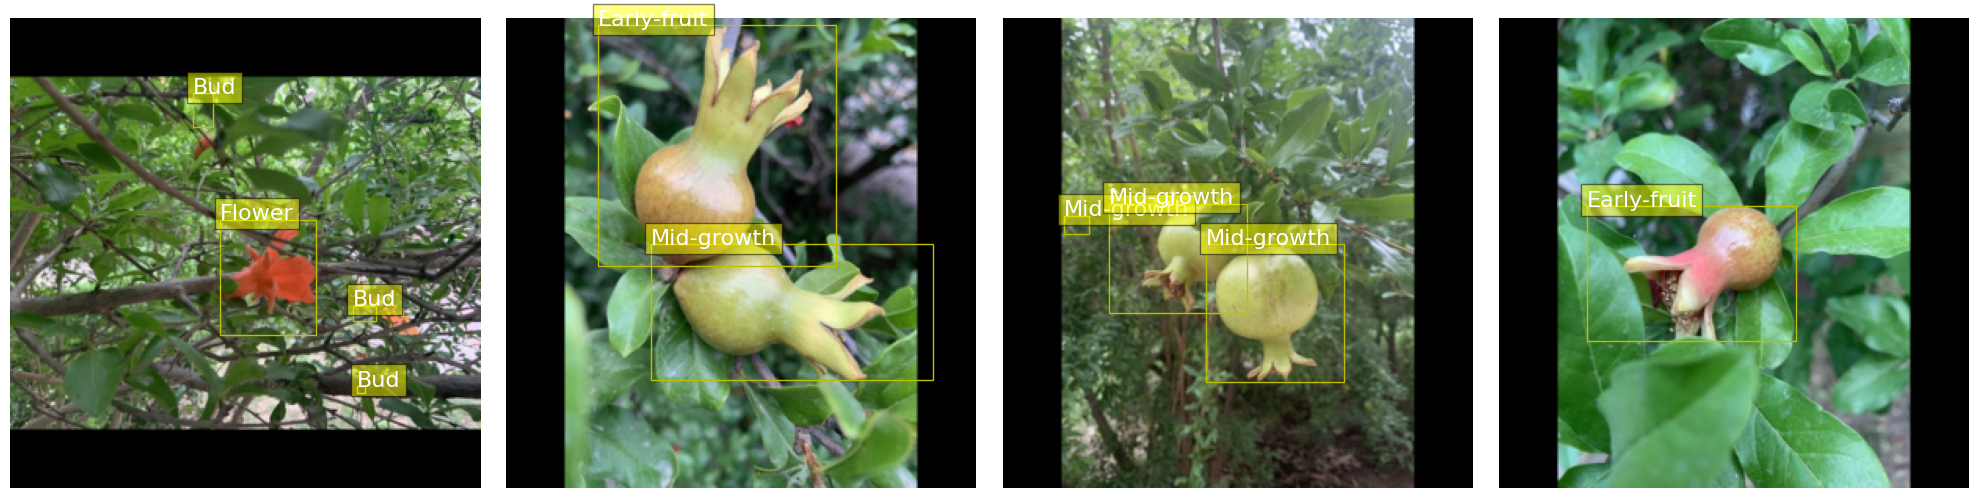

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# Mapping from class indices to class names (update this according to your dataset)
class_names = {0: 'Bud', 1: 'Flower', 2: 'Early-fruit', 3: 'Mid-growth', 4: 'Mature'}

# Function to display images with bounding boxes and class names
def show_images_with_boxes(dataloader, num_images=4):
    fig, axs = plt.subplots(1, num_images, figsize=(20, 5))
    for batch_idx, (images, boxes) in enumerate(dataloader):
        if batch_idx >= num_images:
            break
        image = images[batch_idx].permute(1, 2, 0)  # Convert from CxHxW to HxWxC
        axs[batch_idx].imshow(image)
        for box in boxes[batch_idx]:
            class_label, x_center, y_center, width, height = box
            # Convert from normalized to image coordinates
            x = (x_center - width / 2) * image.shape[1]
            y = (y_center - height / 2) * image.shape[0]
            width = width * image.shape[1]
            height = height * image.shape[0]
            rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor='y', facecolor='none')
            axs[batch_idx].add_patch(rect)
            # Annotate each bounding box with the class name
            label = class_names[class_label.item()]  # Get the class name using the class label
            axs[batch_idx].text(x, y, label, color='white', fontsize=16, bbox=dict(facecolor='yellow', alpha=0.5))
        axs[batch_idx].axis('off')
    plt.tight_layout()
    plt.show()

# Assuming 'dataloader' is already defined and loaded with your dataset
show_images_with_boxes(dataloader)

## Retrieving the SSD Model from GitHub

In [ ]:
!git clone https://github.com/balancap/SSD-Tensorflow.git

Cloning into 'SSD-Tensorflow'...
remote: Enumerating objects: 809, done.
remote: Total 809 (delta 0), reused 0 (delta 0), pack-reused 809
Receiving objects: 100% (809/809), 113.09 MiB | 12.78 MiB/s, done.
Resolving deltas: 100% (545/545), done.
